# Filter Construction for image smoothing

## Explaining a very small kernel and its spread in 3D

To design a filter, we must have some function.

Gaussian 2D function:

$$
    G(x,y) = \frac{1}{2\pi\sigma^2} e^{(-\frac{x^2+y^2}{2\sigma^2})}
$$

where, $\sigma$ is the spread of the function or standard deviation. Thus $\sigma^2$ is the variance.

[[0.0203803  0.02039422 0.02040258 0.02040537 0.02040258 0.02039422
  0.0203803 ]
 [0.02039422 0.02040816 0.02041652 0.02041931 0.02041652 0.02040816
  0.02039422]
 [0.02040258 0.02041652 0.02042489 0.02042768 0.02042489 0.02041652
  0.02040258]
 [0.02040537 0.02041931 0.02042768 0.02043047 0.02042768 0.02041931
  0.02040537]
 [0.02040258 0.02041652 0.02042489 0.02042768 0.02042489 0.02041652
  0.02040258]
 [0.02039422 0.02040816 0.02041652 0.02041931 0.02041652 0.02040816
  0.02039422]
 [0.0203803  0.02039422 0.02040258 0.02040537 0.02040258 0.02039422
  0.0203803 ]]


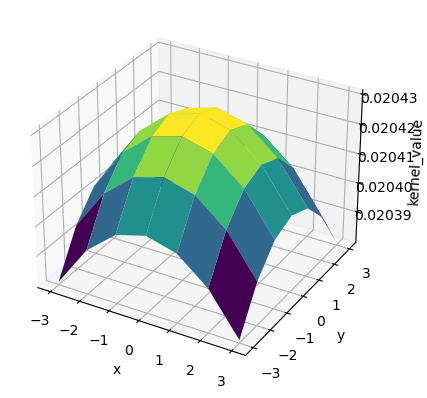

In [16]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 60.5

kernel = np.zeros((7,7))

x_values = [-3, -2, -1, 0, 1, 2, 3]
y_values = [-3, -2, -1, 0, 1, 2, 3]

p, q = np.meshgrid(x_values, y_values)

# calculate kernel values
for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        kernel[i, j] =  (1/(2*np.pi*sigma**2)) * np.exp(-1*(x**2 + y**2)/(2*sigma**2))
        
# normalize kernel
kernel = kernel / np.sum(kernel)

print(kernel)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(p, q, kernel, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('kernel_value')
plt.show()

In [19]:
# calculate the size of the kernel based on the sigma value
sigma = 0.5

size = int(6*sigma + 1)

kernel1 = np.zeros((size, size))

x_values = np.arange(-size//2, size//2 + 1)
y_values = np.arange(-size//2, size//2 + 1)

x,y = np.meshgrid(x_values, y_values)
kernel1 = (1/(2*np.pi*sigma**2)) * np.exp(-1*(x**2 + y**2)/(2*sigma**2))

# normalize kernel
kernel1 = kernel1 / np.sum(kernel1)

(-0.5, 255.5, 255.5, -0.5)

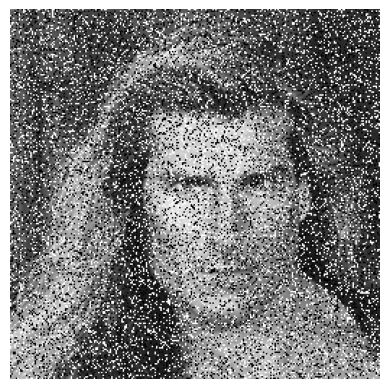

In [14]:
# apply this kernel to an image
image = plt.imread('6.png')
plt.imshow(image, cmap='gray')
plt.axis('off')

/home/dell/anaconda3/envs/latest/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:162: UserWarning: The figure layout has changed to tight
  ax.get_figure().tight_layout()


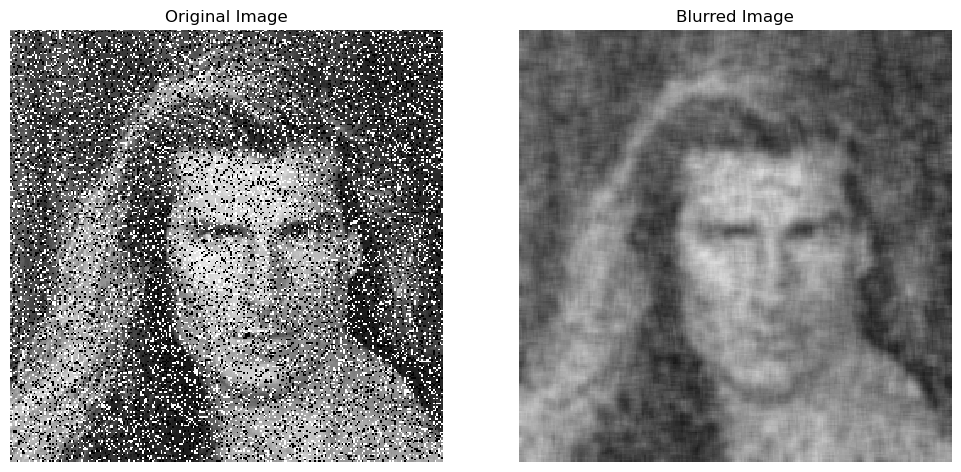

In [21]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from scipy.ndimage import convolve
import cv2 as cv

image = imread('6.png')
#apply convolution
blurred_img = cv.filter2D(image, ddepth=-1, kernel=kernel)

# display the original and the blurred image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
imshow(image, cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
imshow(blurred_img, cmap='gray')
plt.axis('off')
plt.title('Blurred Image')
plt.show()

try to plot the intensities  of the image and blurred image in 3D

## Seperable Gaussian Filter

It can be be applied in two seperate passes (horizontal and vertical) using 1D convlutions instead of a single 2D convolutions.

In [25]:
import matplotlib.pyplot as plt
from scipy.ndimage import convolve1d

def gaussian_kernel(sigma, size):
    x = np.arange(-size // 2, size // 2 + 1)
    kernel =  np.exp(-1 * (x ** 2) / (2 * sigma ** 2))
    return kernel / np.sum(kernel)

def seperable_gaussian_filter(image, sigma):
    size = int(sigma*6 ) + 1
    kernel = gaussian_kernel(sigma, size)
    # apply horizontal and vertical 1D convolutions
    filtered_image = convolve1d(convolve1d(image, kernel, axis=0), kernel, axis=1)
    return filtered_image

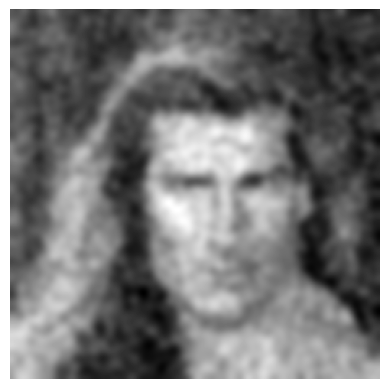

In [30]:
# example usage
image = plt.imread('6.png')
blurred_image = seperable_gaussian_filter(image, sigma=3)
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')
plt.show()

## Apply Gaussian Derivative Kernel